### Notebook for 12 clusters of Spatial and Scramble test

In [2]:
%matplotlib inline
import os
import re
import gc
import cv2
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import adjusted_mutual_info_score as AMI
from matplotlib.backends.backend_pdf import PdfPages

import tensorflow as tf
from tensorflow.contrib.data import parallel_interleave

In [3]:
def comp_protocol_table(data_basedir='./',expname='0000',kernel_list=[],
                        tfname='2-10',bname=None, ncluster=None):
    """ kernel_list [2,3,....] not include 1 pixel
    """
    
    baseline = np.load(os.path.join(data_basedir+'/'+expname,
                        f"clr-{bname}__nc-{ncluster}_kernel1_tfrecord-{tfname}.npy"
                    )
                )
    print(f'check array shape {baseline.shape}')
   
    amis_list = []
    for kernel in kernel_list:
        label = np.load(os.path.join(data_basedir+'/'+expname,
                        f"clr-{bname}__nc-{ncluster}_kernel{kernel}_tfrecord-{tfname}.npy"
                    )
                )
        amis_list.append(AMI(baseline, label))
    print("Normal End")
    return np.array(amis_list)

In [32]:
def comp_protocol_table2(data_basedir='./',expname='0000',kernel_list=[],
                        tfname='2-10',bname1=None,bname2=None, ncluster=None):
    """ kernel_list [2,3,....] not include 1 pixel
    """
    amis_list = []
    for kernel in kernel_list:
          
        baseline = np.load(os.path.join(data_basedir+'/'+expname,
                        f"clr-{bname1}__nc-{ncluster}_kernel{kernel}_tfrecord-{tfname}.npy"
                    )
                )
        print(f'check array shape {baseline.shape}')
   
        label = np.load(os.path.join(data_basedir+'/scrambles/'+expname,
                        f"clr-{bname2}__nc-{ncluster}_kernel{kernel}_tfrecord-{tfname}.npy"
                    )
                )
        
        amis_list.append(AMI(baseline, label))
    print("Normal End")
    return np.array(amis_list)

### Read data

In [5]:
data_basedir = '/home/tkurihana/rotate_invariant/stepbystep/transform/protocol/clustering20201228'

In [6]:
#expnames = ['67011582','634808','3528207','m2_02_global_2000_2018_band28_29_31']
#expnames = ['67011582','66910202','3528207','m2_02_global_2000_2018_band28_29_31']
# 64541244
expnames = ['67011582','66910202','3528207','64541244','m2_02_global_2000_2018_band28_29_31']

In [90]:
case_names = [r"$\lambda_{inv}=32,  \lambda_{res}=80$", 
              r"$\lambda_{inv}= 0,  \lambda_{res}=80$",
              r"$\lambda_{inv}=3.2, \lambda_{res}=8$",
              r"$Compound-NRI$"
             ]


In [19]:
case_names = [r"$\lambda_{inv}=32,  \lambda_{res}=80$", 
              r"$\lambda_{inv}= 0,  \lambda_{res}=80$",
              r"$\lambda_{inv}=3.2, \lambda_{res}=8$",
              r"$RA$",
              r"$Compound-NRI$"
             ]

### Results: blureriness

In [8]:
nclusters = 12

In [10]:
bname = 'sklaggl'
results_list = []
for expname in expnames:
    if expname == 'm2_02_global_2000_2018_band28_29_31' or expname == '64541244':
        kernels = [1]+[ i*4 for i in range(2,10,1)]
        result = comp_protocol_table(data_basedir=data_basedir, expname=expname, kernel_list=kernels,
                                    bname=bname, ncluster=nclusters)
    else:
        kernels = [i for i in range(1,10,1)]
        result = comp_protocol_table(data_basedir=data_basedir, expname=expname, kernel_list=kernels,
                                    bname=bname, ncluster=nclusters)
    results_list.append(result)

check array shape (2000,)
Normal End
check array shape (2000,)
Normal End
check array shape (2000,)
Normal End
check array shape (2000,)
Normal End
check array shape (2000,)
Normal End


In [11]:
# 2-10
results_table_array = np.concatenate(
        [np.expand_dims(i, axis=0) for i in results_list], axis=0
    )
results_table_array.shape

(5, 9)

#### visualize as table

In [16]:
ckernels = ['1'] + [ f'{i}({int(i*4)})' for i in range(2,10,1) ] 

In [20]:
df_rtable = pd.DataFrame(results_table_array[:,1:])
df_all = df_rtable
df_rtable.columns = ckernels[1:]
df_rtable.index = case_names #expnames

In [92]:
df_rtable

,2(8),3(12),4(16),5(20),6(24),7(28),8(32),9(36)
"$\lambda_{inv}=32, \lambda_{res}=80$",0.630229,0.607269,0.663863,0.603607,0.624210,0.577064,0.580073,0.582313
"$\lambda_{inv}= 0, \lambda_{res}=80$",0.668597,0.664619,0.675312,0.630902,0.660821,0.624098,0.597171,0.610953
"$\lambda_{inv}=3.2, \lambda_{res}=8$",0.625848,0.657532,0.640146,0.643666,0.653867,0.660588,0.608097,0.609809
$Compound-NRI$,0.644562,0.657088,0.692399,0.658334,0.673352,0.693186,0.674459,0.627094


In [21]:
df_rtable

,2(8),3(12),4(16),5(20),6(24),7(28),8(32),9(36)
"$\lambda_{inv}=32, \lambda_{res}=80$",0.630229,0.607269,0.663863,0.603607,0.624210,0.577064,0.580073,0.582313
"$\lambda_{inv}= 0, \lambda_{res}=80$",0.668597,0.664619,0.675312,0.630902,0.660821,0.624098,0.597171,0.610953
"$\lambda_{inv}=3.2, \lambda_{res}=8$",0.625848,0.657532,0.640146,0.643666,0.653867,0.660588,0.608097,0.609809
$RA$,0.743429,0.748448,0.704520,0.647891,0.760370,0.695792,0.727063,0.691159
$Compound-NRI$,0.644562,0.657088,0.692399,0.658334,0.673352,0.693186,0.674459,0.627094


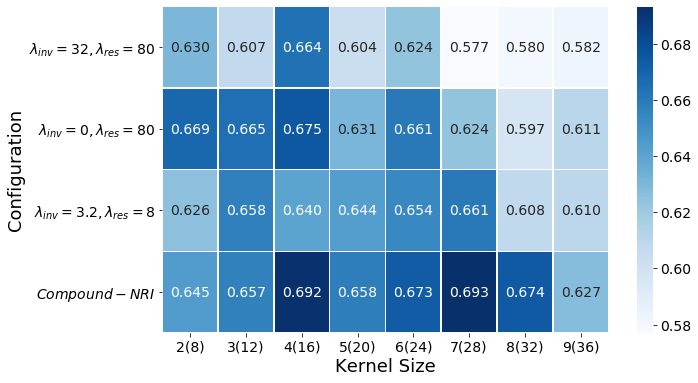

In [102]:
savedir='./figs'
oname='result_spatial_nc12'
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(10, 6))


sns.heatmap(df_all, annot=True, fmt="1.3f", linewidth=.5, cmap='Blues')
ax.set_ylim(len(expnames), 0)
ax.set_ylabel(case_names, fontsize=20)
#plt.yticks(case_snames,rotation=0) 
plt.ylabel("Configuration", fontsize=18)
plt.xlabel("Kernel Size", fontsize=18)

os.makedirs(savedir, exist_ok=True)
pdf = PdfPages(os.path.join(savedir, f'{oname}.pdf'))
plt.savefig(pdf, format='pdf', bbox_inches = 'tight')
plt.show()
pdf.close()
pdf = None
plt.close()

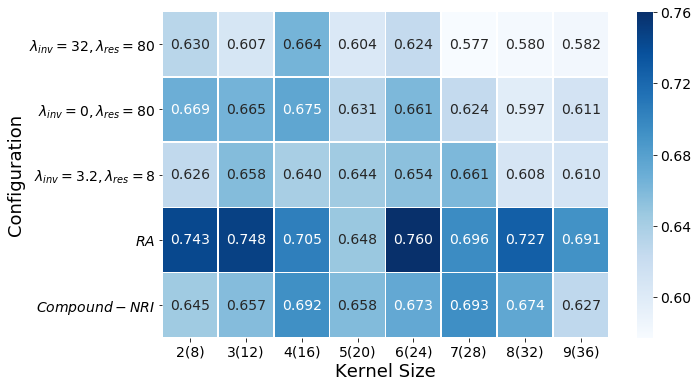

In [22]:
savedir='./figs'
oname='result_spatial_nc12'
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(10, 6))


sns.heatmap(df_all, annot=True, fmt="1.3f", linewidth=.5, cmap='Blues')
ax.set_ylim(len(expnames), 0)
ax.set_ylabel(case_names, fontsize=20)
#plt.yticks(case_snames,rotation=0) 
plt.ylabel("Configuration", fontsize=18)
plt.xlabel("Kernel Size", fontsize=18)

os.makedirs(savedir, exist_ok=True)
pdf = PdfPages(os.path.join(savedir, f'{oname}_withRA.pdf'))
plt.savefig(pdf, format='pdf', bbox_inches = 'tight')
plt.show()
pdf.close()
pdf = None
plt.close()

--------------------------------
### Result: Scramble

In [33]:
bname1 = 'sklaggl'
bname2 = 'scsklaggl'
scresults_list = []
for expname in expnames:
    #if expname == 'm2_02_global_2000_2018_band28_29_31':
    if expname == 'm2_02_global_2000_2018_band28_29_31' or expname == '64541244':
        kernels = [1]+[ i*4 for i in range(2,10,1)]
        result = comp_protocol_table2(data_basedir=data_basedir, expname=expname, kernel_list=kernels,
                                    bname1=bname1,bname2=bname2, ncluster=nclusters)
    else:
        kernels = [i for i in range(1,10,1)]
        result = comp_protocol_table2(data_basedir=data_basedir, expname=expname, kernel_list=kernels,
                                    bname1=bname1,bname2=bname2, ncluster=nclusters)
    scresults_list.append(result)

check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
Normal End
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
Normal End
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
Normal End
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
check array shape (2000,)
Normal End
check array shape (2

In [34]:
# 2-10
scresults_table_array = np.concatenate(
        [np.expand_dims(i, axis=0) for i in scresults_list], axis=0
    )
scresults_table_array.shape

(5, 9)

In [35]:
df_sctable = pd.DataFrame(scresults_table_array)
df_all = df_sctable
df_sctable.columns = ckernels
df_sctable.index = case_names #expnames

In [98]:
df_sctable

,1,2(8),3(12),4(16),5(20),6(24),7(28),8(32),9(36)
"$\lambda_{inv}=32, \lambda_{res}=80$",0.636101,0.611526,0.600597,0.612398,0.583543,0.618920,0.599980,0.625399,0.588673
"$\lambda_{inv}= 0, \lambda_{res}=80$",0.630941,0.628731,0.637009,0.640977,0.625884,0.678126,0.584667,0.590405,0.602806
"$\lambda_{inv}=3.2, \lambda_{res}=8$",0.641963,0.624359,0.627303,0.645600,0.608485,0.632922,0.584827,0.606359,0.592757
$Compound-NRI$,0.654352,0.609624,0.651604,0.618141,0.637229,0.622713,0.667707,0.701920,0.641728


In [36]:
df_sctable

,1,2(8),3(12),4(16),5(20),6(24),7(28),8(32),9(36)
"$\lambda_{inv}=32, \lambda_{res}=80$",0.636101,0.611526,0.600597,0.612398,0.583543,0.618920,0.599980,0.625399,0.588673
"$\lambda_{inv}= 0, \lambda_{res}=80$",0.630941,0.628731,0.637009,0.640977,0.625884,0.678126,0.584667,0.590405,0.602806
"$\lambda_{inv}=3.2, \lambda_{res}=8$",0.641963,0.624359,0.627303,0.645600,0.608485,0.632922,0.584827,0.606359,0.592757
$RA$,0.709061,0.704234,0.721909,0.741035,0.660588,0.770461,0.675736,0.757830,0.749170
$Compound-NRI$,0.654352,0.609624,0.651604,0.618141,0.637229,0.622713,0.667707,0.701920,0.641728


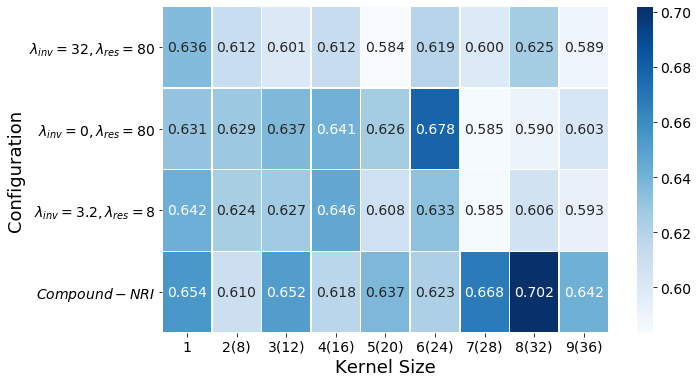

In [100]:
savedir='./figs'
oname='result_scramble_nc12'
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(10, 6))


sns.heatmap(df_all, annot=True, fmt="1.3f", linewidth=.5, cmap='Blues')
ax.set_ylim(len(expnames), 0)
ax.set_ylabel(case_names, fontsize=20)
#plt.yticks(case_snames,rotation=0) 
plt.ylabel("Configuration", fontsize=18)
plt.xlabel("Kernel Size", fontsize=18)

os.makedirs(savedir, exist_ok=True)
pdf = PdfPages(os.path.join(savedir, f'{oname}.pdf'))
plt.savefig(pdf, format='pdf', bbox_inches = 'tight')
plt.show()
pdf.close()
pdf = None
plt.close()

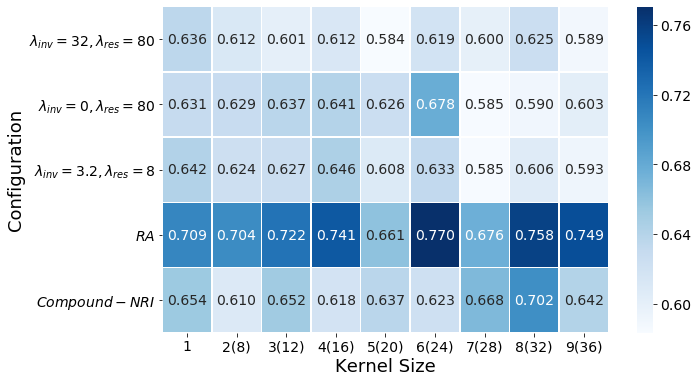

In [37]:
savedir='./figs'
oname='result_scramble_nc12'
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize=(10, 6))


sns.heatmap(df_all, annot=True, fmt="1.3f", linewidth=.5, cmap='Blues')
ax.set_ylim(len(expnames), 0)
ax.set_ylabel(case_names, fontsize=20)
#plt.yticks(case_snames,rotation=0) 
plt.ylabel("Configuration", fontsize=18)
plt.xlabel("Kernel Size", fontsize=18)

os.makedirs(savedir, exist_ok=True)
pdf = PdfPages(os.path.join(savedir, f'{oname}_withRA.pdf'))
plt.savefig(pdf, format='pdf', bbox_inches = 'tight')
plt.show()
pdf.close()
pdf = None
plt.close()